# An overall usage of scikit-learn regression options

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
data.shape

(1460, 81)

In [5]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Checking/Plotting missing values

In [6]:
missing_val_count_by_column = (data.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0].sort_values(ascending=False))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


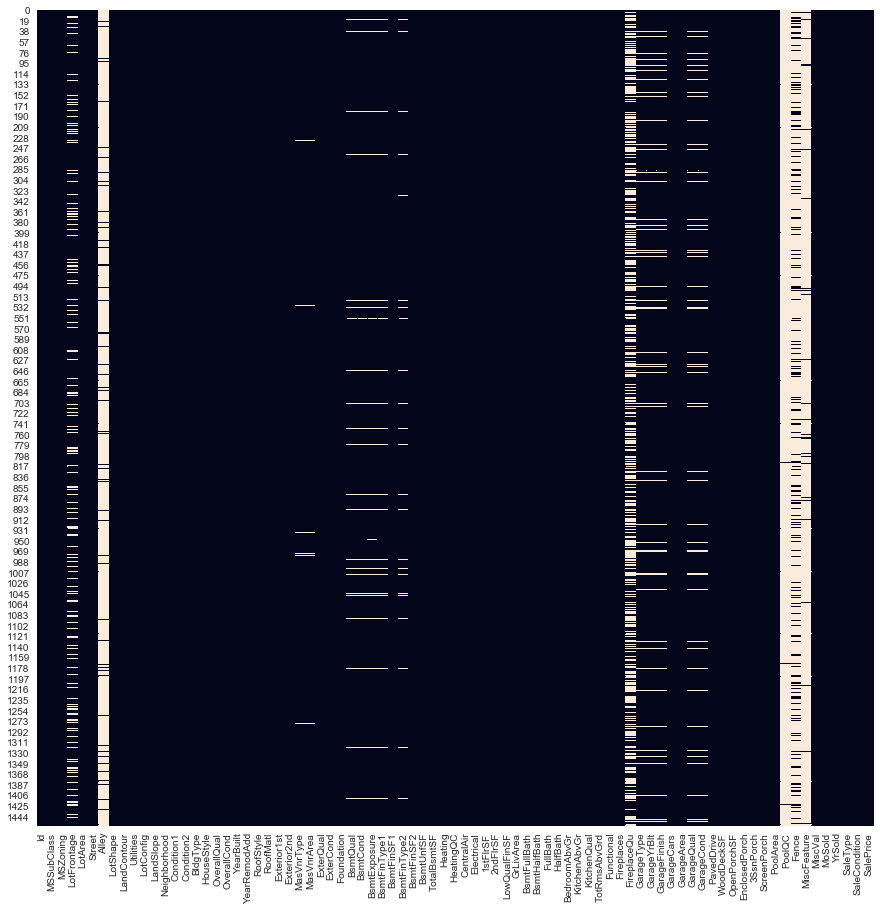

In [7]:
%matplotlib inline
import seaborn as sns
sns.set(rc={'figure.figsize':(15,15)})
sns.heatmap(data.isnull(), cbar=False)

Let's remove Alley, FireplaceQu, PoolQC, Fence, MiscFeature since they have **SO MANY** missing values.

In [8]:
data = data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [9]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [10]:
# drop by Name
X = data.drop(['Id', 'SalePrice'], axis=1)
y = data['SalePrice']

In [11]:
import numpy as np
# https://www.kaggle.com/dansbecker/using-categorical-data-with-one-hot-encoding
one_hot_encoded_training_predictors = pd.get_dummies(X, dtype=np.float)

In [12]:
# help(pd.get_dummies)

In [13]:
X.shape

(1460, 74)

In [14]:
one_hot_encoded_training_predictors.shape

(1460, 270)

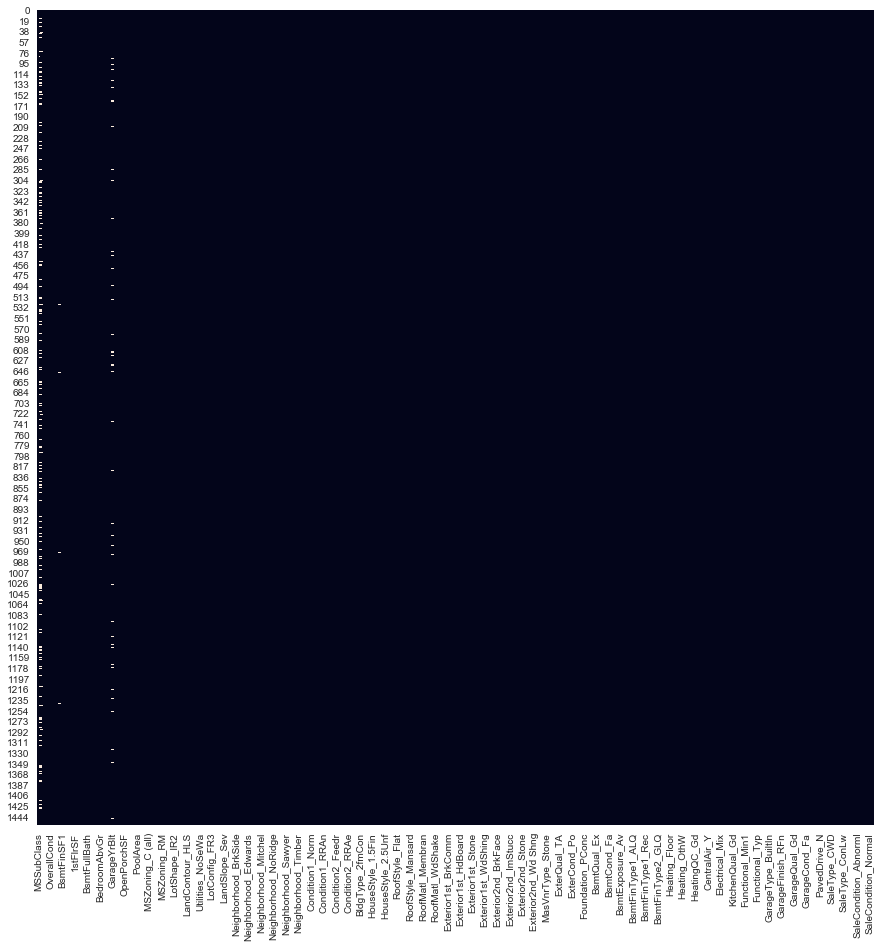

In [15]:
sns.heatmap(one_hot_encoded_training_predictors.isnull(), cbar=False)

Let's input the missing values of the ones who is left.

In [16]:
# https://scikit-learn.org/stable/modules/impute.html#impute
from sklearn.preprocessing import Imputer

**Note that it is np.nan in the missing values!**

In [17]:
imp = Imputer(missing_values = np.nan, strategy = 'median', axis = 0)
imp.fit(one_hot_encoded_training_predictors)
X = imp.transform(one_hot_encoded_training_predictors)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [18]:
X.shape

(1460, 270)

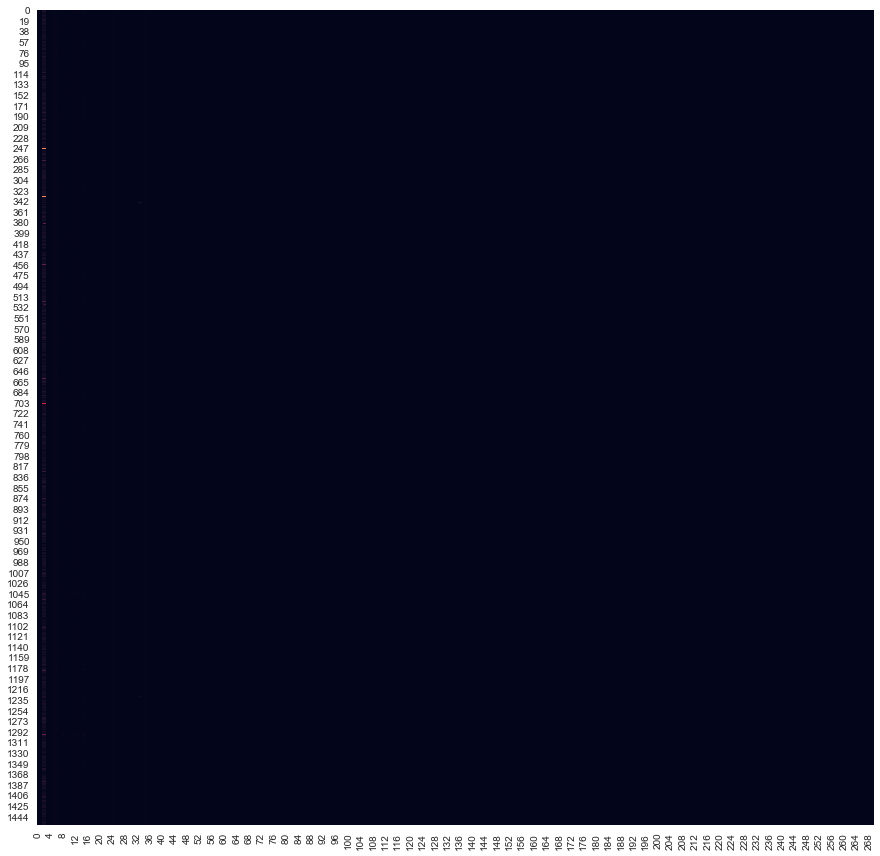

In [19]:
sns.heatmap(X, cbar=False)

### Very basic linear regression

In [20]:
from sklearn import linear_model
reg_all = linear_model.LinearRegression()

In [21]:
reg_all.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

But, this is not ML... this is statistics... Let's brake the data to start the "ML":

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3, random_state = 235423)

In [24]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
reg.score(X_valid, y_valid) # R^2 (can be negative depending on how awful is your model to predict test)

0.8835026721582286

This is not enough... you need to do Cross-Validation:

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
reg = linear_model.LinearRegression()
cv_results = cross_val_score(reg, X, y, cv = 5)

In [28]:
cv_results

array([0.84857821, 0.82175157, 0.81168885, 0.88753456, 0.66802344])

### Regularized regressions: Ridge and Lasso

We have **so many** features in the data, let's perfoemd a regularized regression (Ridge or Lasso)

Ridge: the term penalty is the square of coefficients (L2)

Lasso: the term penalty is the absolute value of coefficients (L1) (SHRINKS the magnitude of the coefficient to zero)

In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1, normalize = True) # If normalize True, the regressors X will be normalized before regression by subtracting the mean and dividing by the l2-norm.
ridge.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [30]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
lasso_coef = lasso.coef_

In [32]:
lasso_coef.min()

-652921.5377959136

In [33]:
feature_names = one_hot_encoded_training_predictors.columns

Observe that the coefficients for the Lasso regression are shrinkaged towards zero to highlight to most important ones.

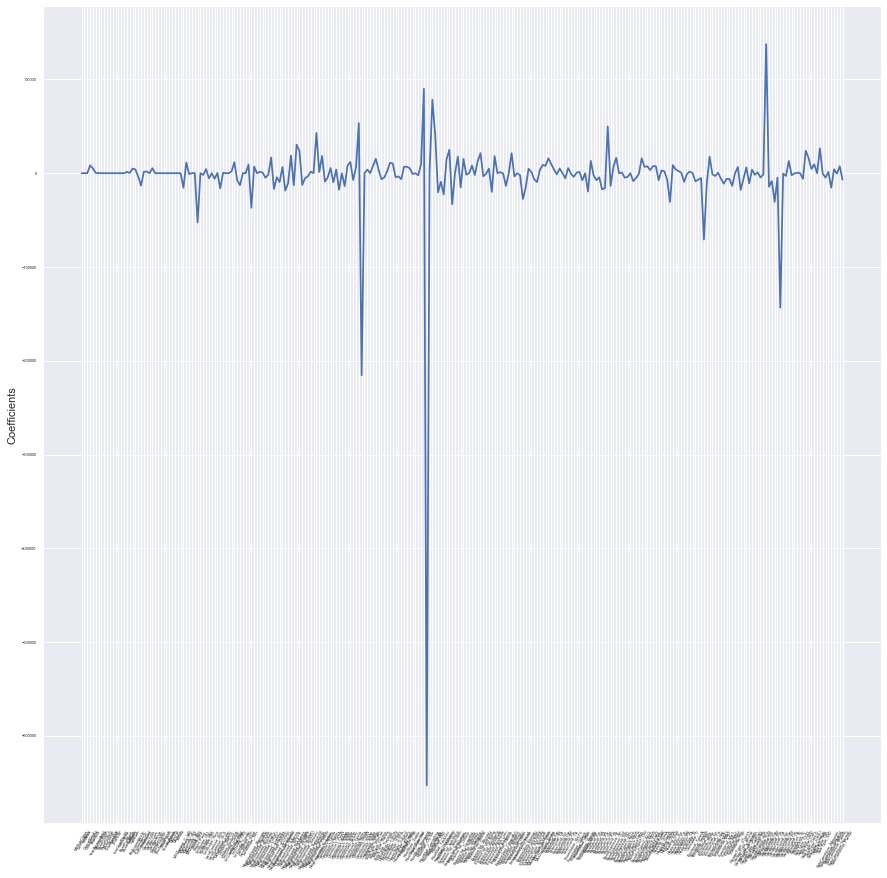

In [34]:
sns.set(rc={'figure.figsize':(15,15)})
_ = plt.plot(range(len(feature_names)), lasso_coef)
_ = plt.xticks(range(len(feature_names)), feature_names, rotation = 60)
_ = plt.ylabel('Coefficients')
_ = plt.tick_params(axis='both', labelsize = 4) # Label size of the tickmarks

**Note that the coefficients of the Lasso regression are not very sensitive to the alpha parameter!**

In [35]:
lasso = Lasso(alpha = 0.9)
lasso.fit(X_train, y_train)
lasso_coef = lasso.coef_

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [36]:
lasso_coef.min()

-649006.6742983139

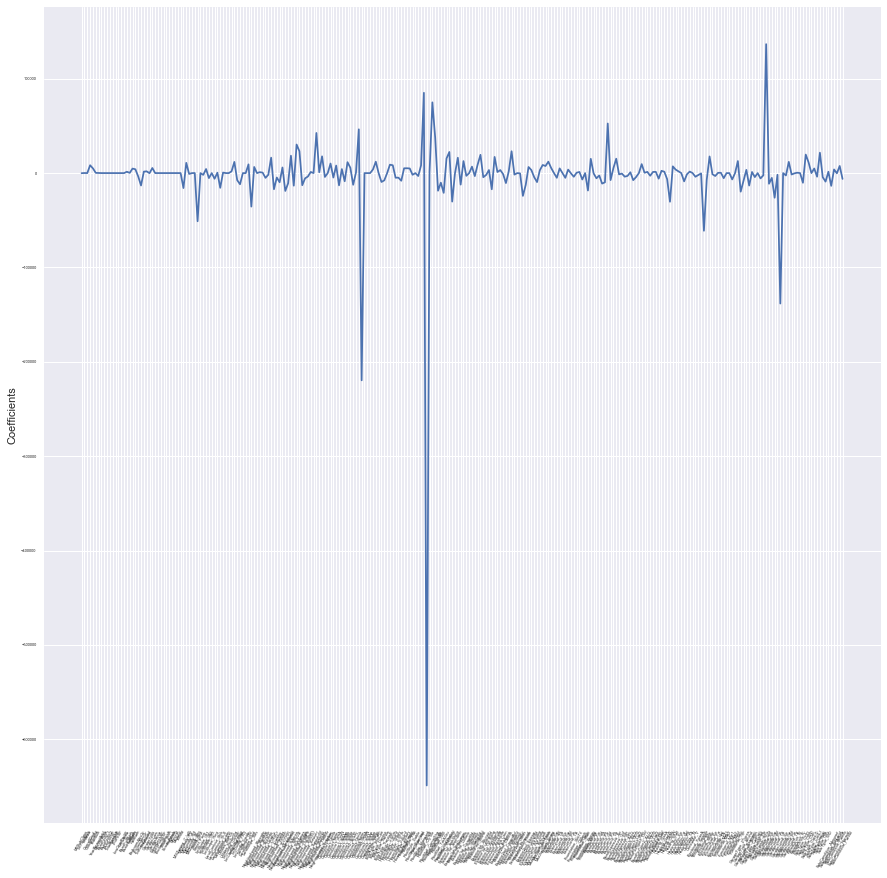

In [37]:
sns.set(rc={'figure.figsize':(15,15)})
_ = plt.plot(range(len(feature_names)), lasso_coef)
_ = plt.xticks(range(len(feature_names)), feature_names, rotation = 60)
_ = plt.ylabel('Coefficients')
_ = plt.tick_params(axis='both', labelsize = 4) # Label size of the tickmarks

### Hyperparameter Tuning

However, let's try to tune this alpha for the Ridge and Lasso with some hyperparameter tuning.

In [38]:
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha' : np.arange(0.05, 1, 0.05)}

# Another option (not used)
#param_grid = {'alpha' : [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]}


Ridge Tuning (using MAE as metric):

In [39]:
ridge = Ridge(normalize = True)
ridge_cv = GridSearchCV(ridge, param_grid, cv = 5, verbose = 1, scoring='neg_mean_absolute_error')
#ridge_cv = GridSearchCV(ridge, param_grid, cv = 5, verbose = 1, scoring='neg_mean_squared_log_error')

# THE INFORMATIVE ERROR FROM KERNEL ON KAGGLE (updaed version of scikit-learn):
# ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.

In [40]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.20.3.


In [41]:
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [42]:
ridge_cv.best_params_

{'alpha': 0.3}

Lasso Tuning:

In [43]:
lasso = Lasso(tol = 0.1) # The default tolerance wasn't conveging the algorithm...
lasso_cv = GridSearchCV(lasso, param_grid, cv = 5, verbose = 1, scoring='neg_mean_absolute_error')
#lasso_cv = GridSearchCV(lasso, param_grid, cv = 5, verbose = 1, scoring='neg_mean_squared_log_error')

In [44]:
lasso_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_absolute_error', verbose=1)

In [45]:
lasso_cv.best_params_

{'alpha': 0.9500000000000001}

In [46]:
lasso_cv.best_score_

-26517.867211991444

Submitiing Ridge, sice it was better than Lasso:

In [47]:
test_data = test_data.drop(['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

In [48]:
test_X = test_data.drop(['Id'], axis=1)

In [49]:
test_one_hot_encoded_training_predictors = pd.get_dummies(test_X, dtype=np.float)

In [50]:
# I had this problem of unmatching columns of train and test after one-hot-encoding: https://stackoverflow.com/questions/41335718/keep-same-dummy-variable-in-training-and-testing-data


# Get missing columns in the training test
missing_cols = set( one_hot_encoded_training_predictors.columns ) - set( test_one_hot_encoded_training_predictors.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    test_one_hot_encoded_training_predictors[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
test_one_hot_encoded_training_predictors = test_one_hot_encoded_training_predictors[one_hot_encoded_training_predictors.columns]

In [51]:
imp = Imputer(missing_values = np.nan, strategy = 'median', axis = 0)
imp.fit(test_one_hot_encoded_training_predictors)
test_X = imp.transform(test_one_hot_encoded_training_predictors)

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [52]:
ridge = Ridge(alpha = list(ridge_cv.best_params_.values())[0], normalize = True)
ridge.fit(X, y)

Ridge(alpha=0.3, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [53]:
y_pred = ridge.predict(test_X)

In [54]:
final_sub = pd.DataFrame.from_dict({'Id': test_data.Id, 'SalePrice': y_pred})
final_sub.head()

,Id,SalePrice
0,1461,112459.226429
1,1462,156802.893777
2,1463,184611.147379
3,1464,196530.869303
4,1465,201822.786117


In [55]:
final_sub.to_csv('submit_file.csv', sep=',', index = False) # Public Score 0.14073 (The Lasso (omitted in this notebook) was worse: 0.18601)

---

#### So, I figure out that to actually work with a more appropriate metric to check model performace (in Kaggle they work with Root Mean Squared Logarithmic Error) it is to work with **logarithmic** of the price (shrinking the variance, therefore) and working with Root Mean Squared Error (RMSE) (`'neg_mean_squared_error'`). <font color='red'>**Let's work with the logarithmic scale from now on!**</font>

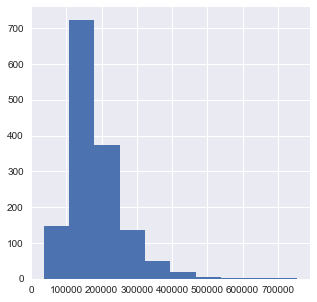

In [56]:
y.hist(figsize = (5, 5))

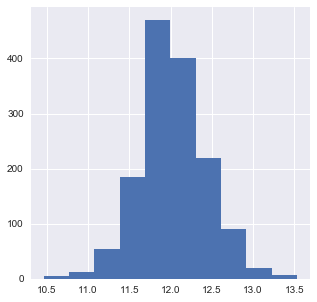

In [57]:
y_log = np.log(y)
y_log.hist(figsize = (5, 5))

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y_log, test_size = 0.3, random_state = 235423)

In [59]:
param_grid = {'alpha' : np.arange(0.05, 1, 0.05)}
ridge = Ridge(normalize = True)
ridge_cv = GridSearchCV(ridge, param_grid, cv = 5, verbose = 1, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train, y_train)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    0.5s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [60]:
ridge_cv.best_score_

-0.024145817495355666

In [61]:
np.sqrt(-1 * ridge_cv.best_score_) # RMSE (the RMSLE of Kaggle)

0.15538924510839117

In [62]:
ridge_cv.best_params_

{'alpha': 0.45}

In [63]:
# "The model is trained on the full development set."
# "The scores are computed on the full evaluation set."
y_true, y_pred = y_valid, ridge_cv.predict(X_valid)

In [64]:
np.sqrt(np.mean((y_true - y_pred) ** 2)) # Estimation of Validation score

0.1173437048470548

In [65]:
y_pred = np.exp(ridge_cv.predict(test_X))

In [66]:
final_sub = pd.DataFrame.from_dict({'Id': test_data.Id, 'SalePrice': y_pred})
final_sub.to_csv('ridge_tuned_logarithmic_scale.csv', sep=',', index = False) # Public Score 0.13785! It improved from the non-logarithmic Ridge! 

Let's train this with Full Data:

In [67]:
ridge = Ridge(normalize = True)
ridge_cv = GridSearchCV(ridge, param_grid, cv = 5, verbose = 1, scoring='neg_mean_squared_error')
ridge_cv.fit(X, y_log)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 19 candidates, totalling 95 fits


[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    1.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [68]:
y_pred = np.exp(ridge_cv.predict(test_X))

In [69]:
final_sub = pd.DataFrame.from_dict({'Id': test_data.Id, 'SalePrice': y_pred})
final_sub.to_csv('ridge_tuned_logarithmic_scale_trained_with_FULL_DATA.csv', sep=',', index = False) # Public Score: 0.13324! Improved even more!

# Fitting a Support Vector Machine (SVM)... In regression it is Support Vector Regression (SVR)

https://scikit-learn.org/stable/modules/svm.html

In [70]:
from sklearn import svm
#help(svm)

In [71]:
param_grid = {'epsilon' : np.linspace(1, 10, 20),
              'C' : np.arange(0.5, 2, 0.5)}

In [72]:
clf = svm.SVR(kernel = 'rbf', degree = 3)
clf_cv = GridSearchCV(clf, param_grid, cv = 5, verbose = 1, scoring='neg_mean_squared_error')
clf_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' 

Fitting 5 folds for each of 60 candidates, totalling 300 fits


C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epsilon': array([ 1.     ,  1.47368,  1.94737,  2.42105,  2.89474,  3.36842,
        3.84211,  4.31579,  4.78947,  5.26316,  5.73684,  6.21053,
        6.68421,  7.15789,  7.63158,  8.10526,  8.57895,  9.05263,
        9.52632, 10.     ]), 'C': array([0.5, 1. , 1.5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [73]:
clf_cv.best_score_

-0.16911230255295528

In [74]:
np.sqrt(-1 * clf_cv.best_score_)

0.41123266231289957

In [75]:
clf_cv.best_params_

{'C': 0.5, 'epsilon': 1.9473684210526314}

In [79]:
y_true, y_pred = y_valid, clf_cv.predict(X_valid)

In [80]:
np.sqrt(np.mean((y_true - y_pred) ** 2)) # Estimation of Validation score

0.37725610118069886

In [81]:
# Fitting with full data
clf = svm.SVR(kernel = 'rbf', degree = 3)
clf_cv = GridSearchCV(clf, param_grid, cv = 5, verbose = 1, scoring='neg_mean_squared_error')
clf_cv.fit(X, y_log)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' 

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\renan\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\User

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'epsilon': array([ 1.     ,  1.47368,  1.94737,  2.42105,  2.89474,  3.36842,
        3.84211,  4.31579,  4.78947,  5.26316,  5.73684,  6.21053,
        6.68421,  7.15789,  7.63158,  8.10526,  8.57895,  9.05263,
        9.52632, 10.     ]), 'C': array([0.5, 1. , 1.5])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=1)

In [82]:
y_pred = np.exp(clf_cv.predict(test_X))

In [83]:
final_sub = pd.DataFrame.from_dict({'Id': test_data.Id, 'SalePrice': y_pred})
final_sub.to_csv('svr_tuned_logarithmic_scale_trained_with_FULL_DATA.csv', sep=',', index = False) # Public Score: 0.13324! Improved even more!

## So, as a lesson, the valid dataset IS NOT used to train the model in the cross-validation. It is only used to check the Hold-Out performance of the tuned model.